In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import random as rd
import scipy.optimize
from scipy.stats import linregress

%matplotlib inline

In [6]:
to = [_ for _ in range(20)]
t_df = pd.DataFrame(data=to)
tn = t_df[0].to_numpy()

In [3]:
no = [800., 
      723.86993443, 
      654.98460246, 
      592.65457655, 
      536.25603683, 
      485.22452777,
      439.04930888,
      397.26824303,
      359.46317129,
      325.25572779,
      294.30355294,
      266.29686696,
      240.95536953,
      218.02543443,
      197.27757115,
      178.50412812,
      161.5172144,
      146.14681924,
      132.23911058,
      119.65489538]
n_df = pd.DataFrame(data=no)
n = n_df[0].to_numpy()

In [7]:
# 1A
def fit_exp(t, N_0, k):
  return N_0*np.exp(-k*t)

[300.         271.45122541 245.61922592 222.2454662  201.09601381
 181.95919791 164.64349083 148.97559114 134.79868924 121.97089792
 110.36383235  99.86132511  90.35826357  81.75953791  73.97908918
  66.93904804  60.5689554   54.80505722  49.58966647  44.87058577]


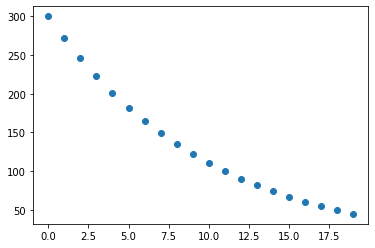

In [8]:
exp_function = fit_exp(tn, 300, 0.1)
print(exp_function)
plt.scatter(tn,exp_function)

In [9]:
# 1B

In [10]:
initial_guess = [400,0.1]

In [12]:
parameters, covariance = scipy.optimize.curve_fit(fit_exp, t, n, initial_guess)

In [13]:
print(parameters, covariance, end='\n')

[8.e+02 1.e-01] [[2.9071647e-18 4.3665547e-22]
 [4.3665547e-22 1.3172879e-25]]


In [14]:
# Test above
try:
  assert parameters.any()
  assert covariance.any()
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [15]:
N_0 = parameters[0]
k = parameters[1]

In [16]:
# Test above
try:
  assert N_0
  assert k
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [17]:
# 1C
fitted_n = fit_exp(t,N_0,k)

In [18]:
fitted_n

array([800.        , 723.86993443, 654.98460246, 592.65457655,
       536.25603683, 485.22452777, 439.04930888, 397.26824303,
       359.46317129, 325.25572779, 294.30355294, 266.29686696,
       240.95536953, 218.02543443, 197.27757115, 178.50412812,
       161.5172144 , 146.14681924, 132.23911058, 119.65489538])

<AxesSubplot:>

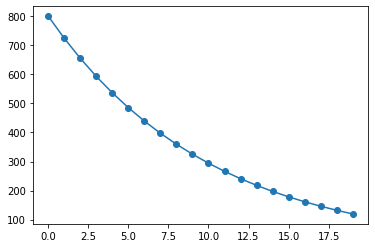

In [19]:
# 1D
def plot_exp(t, n, fitted_n):
  plt.scatter(t, n)
  plt.plot(t, fitted_n)
  return plt.gca()

plot_exp(t, n, fitted_n)

In [20]:
# 1E 
k_new = 0.15

In [21]:
def get_half_life(k_new):
  ln2 = np.log(2) # euler based logarithm
  return ln2/k_new

In [22]:
t_half = get_half_life(k_new)
print(f'The half-life is {t_half:.2} s.')

The half-life is 4.6 s.


In [138]:
k_list = [123, 34, 234]
T_list = [34.664245, 23.21523, 34.24234]

In [139]:
# 2A
def log_reaction_rate(k_list):
  # take k value in k_list and natural log it.
  return np.array(list(map(lambda k: np.log(k), k_list)))
  
log_k = log_reaction_rate(k_list)
log_k

array([4.81218436, 3.52636052, 5.45532112])

In [119]:
try:
  assert log_k.any()
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [120]:
def inverse_temp(T_list):
  # take T value in T_list and take inverse.
  return np.array(list(map(lambda T: 1/T, T_list)))
  
inv_T = inverse_temp(T_list)
inv_T

array([0.0085, 0.0075, 0.0065, 0.0055, 0.0045, 0.0035])

In [121]:
try:
  assert inv_T.any()
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [141]:
# example data to 2b
# https://socratic.org/questions/how-do-you-plot-the-arrhenius-equation#245467
#log_k = np.array([-8.62, -5.91, -3.51, -1.35])
#inv_T = np.array([0.00133, 0.00126, 0.00118, 0.00112])

# https://courses.lumenlearning.com/suny-introductorychemistry/chapter/activation-energy-and-the-arrhenius-equation-2/
inv_T = np.array([0.002667, 0.0025, 0.002, 0.001667])
log_k = np.array([-10.9941, -10.2602, -7.77526, -6.16107])

In [142]:
# 2B
lin_regression = linregress(log_k, inv_T)
print(lin_regression)

LinregressResult(slope=-0.00020549628279175898, intercept=0.00040061408647496075, rvalue=-0.9998928001472069, pvalue=0.00010719985279306067, stderr=2.1278253778302886e-06, intercept_stderr=1.9166834899285404e-05)


In [143]:
slope = lin_regression.slope
intercept = lin_regression.intercept

In [144]:
fit = slope*(inv_T)+intercept
fit

array([0.00040007, 0.0004001 , 0.0004002 , 0.00040027])

<AxesSubplot:xlabel='$\\frac{1}{T}$', ylabel='${\\ln k}$'>

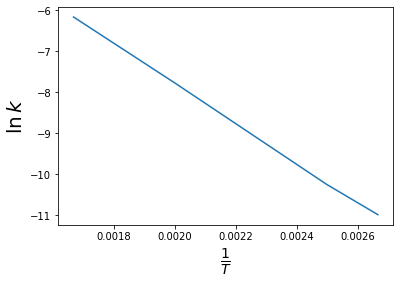

In [145]:
# 2C
def plot_arrhenius(inv_T, log_k, fit):
  fig, ax = plt.subplots()
  ax.plot(inv_T, log_k)

  # set labels
  ax.set_xlabel(r'$\frac{1}{T}$', fontsize=20)
  ax.set_ylabel(r'${\ln k}$', fontsize=20)
  return plt.gca()

plot_arrhenius(inv_T, log_k, fit)

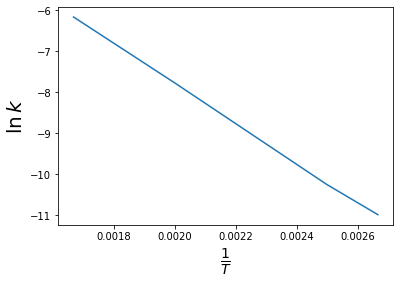

In [146]:
assert isinstance(plot_arrhenius(inv_T, log_k, fit), matplotlib.figure.Axes), 'wrong return type'

In [180]:
# 2D
def get_activation_energy(slope):
  R = 8.3145
  Ea = (R/slope)
  return Ea

activation_energy = get_activation_energy(slope)
print(f'Activation energy: {activation_energy:.1E} J mol^-1')

-40460.58589013775
Activation energy: -4.0E+04 J mol^-1


In [181]:
# 2E 
def get_pre_exp_factor(intercept):
  raise NotImplementedError()
  
pre_exp_factor = get_pre_exp_factor(intercept)
print(f'Pre-exponential factor: {pre_exp_factor:.1E} mol^-1 s^-1')

NotImplementedError: 

In [196]:
color_intesity = np.arange(11)
hue = np.array([0, 0, 0, 1, 1, 1, 1, 4, 345, 23, 234])
print(color_intesity)
print(hue)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  0   0   0   1   1   1   1   4 345  23 234]


In [200]:
# 2F

from scipy.stats import pearsonr # ADD THIS!
r_value, _  = pearsonr(color_intesity, hue)